#Prediction Model for Distribution Center Receiving Forecast

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [ ]:
import warnings 
warnings. filterwarnings("ignore")

In [ ]:
! git clone https://github.com/aviraljoshi23/Hacks.git

Cloning into 'Hacks'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [ ]:
inbound = pd.read_excel('/content/Hacks/dataset-New/Inbound.xlsx')
sales = pd.read_excel('/content/Hacks/dataset-New/Sales units.xlsx')

In [ ]:
units = pd.read_excel('/content/Hacks/dataset-New/Recipt Units.xlsx',parse_dates = False)

In [ ]:
units.head()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
0,92,1,2019,1,22944.0
1,92,2,2019,1,32856.0
2,92,3,2019,1,1536.0
3,92,4,2019,1,55714.0
4,92,5,2019,1,940.0


In [ ]:
units.tail()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
241492,64,186,2021,34,812.0
241493,64,187,2021,34,3372.0
241494,64,251,2021,34,25422.0
241495,64,188,2021,34,6231.0
241496,64,293,2021,34,347.0


In [ ]:
inbound.head()

,Scrub_dc_no,Year,Week,Inbound Truckloads
0,92,2019,1,115
1,76,2019,1,165
2,78,2019,1,161
3,98,2019,1,189
4,3,2019,1,113


In [ ]:
sales.head()

,SCRUB_DC_NO,YEAR,WEEK,SCRUB_CATEGORY_NO,SALES_UNITS
0,3,2019,1,1,18871
1,3,2019,1,2,22076
2,3,2019,1,3,5459
3,3,2019,1,4,36976
4,3,2019,1,5,3832


In [ ]:
def data_description(data):
  print(data.info())
  print('---'*30)
  print(data.describe().T)
  print('---'*30)
  print(data.isnull().any())
  print('---'*30)
  print(data.nunique())
  return 

In [ ]:
data_description(units)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241497 entries, 0 to 241496
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SCRUB_DC_NO        241497 non-null  int64  
 1   SCRUB_Category_no  241497 non-null  int64  
 2   Year               241497 non-null  int64  
 3   Week               241497 non-null  int64  
 4   ReceiptUnits       241497 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 9.2 MB
None
------------------------------------------------------------------------------------------
                      count         mean          std  ...     50%     75%       max
SCRUB_DC_NO        241497.0    64.995346    28.327958  ...    76.0    92.0      98.0
SCRUB_Category_no  241497.0   140.843162    88.473886  ...   139.0   209.0     347.0
Year               241497.0  2019.901212     0.772693  ...  2020.0  2021.0    2021.0
Week               241497.0    24.371466    14.310415  ...   

In [ ]:
data_description(inbound)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Scrub_dc_no         1093 non-null   int64
 1   Year                1093 non-null   int64
 2   Week                1093 non-null   int64
 3   Inbound Truckloads  1093 non-null   int64
dtypes: int64(4)
memory usage: 34.3 KB
None
------------------------------------------------------------------------------------------
                     count         mean        std  ...     50%     75%     max
Scrub_dc_no         1093.0    64.626715  28.617691  ...    76.0    92.0    98.0
Year                1093.0  2019.907594   0.781931  ...  2020.0  2021.0  2021.0
Week                1093.0    24.240622  14.299636  ...    24.0    35.0    52.0
Inbound Truckloads  1093.0   353.197621  89.245470  ...   355.0   416.0   638.0

[4 rows x 8 columns]
-------------------------------------------------------

In [ ]:
data_description(sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356992 entries, 0 to 356991
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   SCRUB_DC_NO        356992 non-null  int64
 1   YEAR               356992 non-null  int64
 2   WEEK               356992 non-null  int64
 3   SCRUB_CATEGORY_NO  356992 non-null  int64
 4   SALES_UNITS        356992 non-null  int64
dtypes: int64(5)
memory usage: 13.6 MB
None
------------------------------------------------------------------------------------------
                      count         mean          std  ...     50%     75%       max
SCRUB_DC_NO        356992.0    64.501689    28.702662  ...    76.0    92.0      98.0
YEAR               356992.0  2019.873490     0.777990  ...  2020.0  2020.0    2021.0
WEEK               356992.0    24.371258    14.417331  ...    24.0    35.0      52.0
SCRUB_CATEGORY_NO  356992.0   165.169337    95.922414  ...   164.0   246.0     347.0
S

In [ ]:
units.shape

(241497, 5)

In [ ]:
units['SCRUB_DC_NO'].value_counts()

41    31723
92    31055
98    30647
78    30382
76    30026
65    29665
64    29198
3     28801
Name: SCRUB_DC_NO, dtype: int64

# Units Exploring 

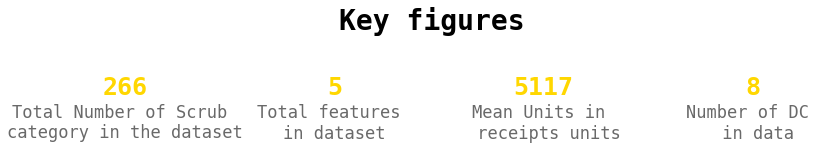

In [ ]:
fig=plt.figure(figsize=(5,2),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.text(1.1,1,"Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,"266",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.005,"Total Number of Scrub \ncategory in the dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.75,0.4,"5",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.75,0.001,"Total features \nin dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.5,0.4,"5117",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.5,0.001,"Mean Units in \n receipts units",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(2.25,0.4,"8",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(2.25,0.001,"Number of DC \n in data",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

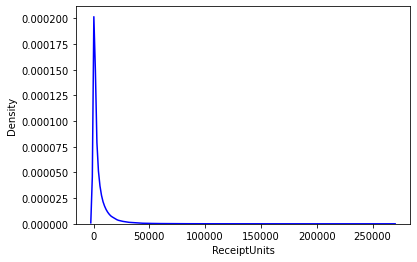

In [ ]:
sns.kdeplot(units['ReceiptUnits'], color='b', shade=False, Label='ReceiptUnits') 

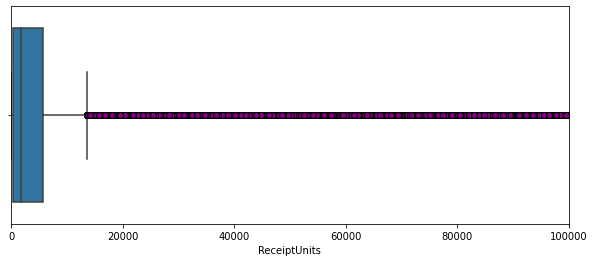

In [ ]:
plt.figure(figsize=(10,4))
plt.xlim(-100,100000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
sns.boxplot(x=units.ReceiptUnits, flierprops=flierprops)

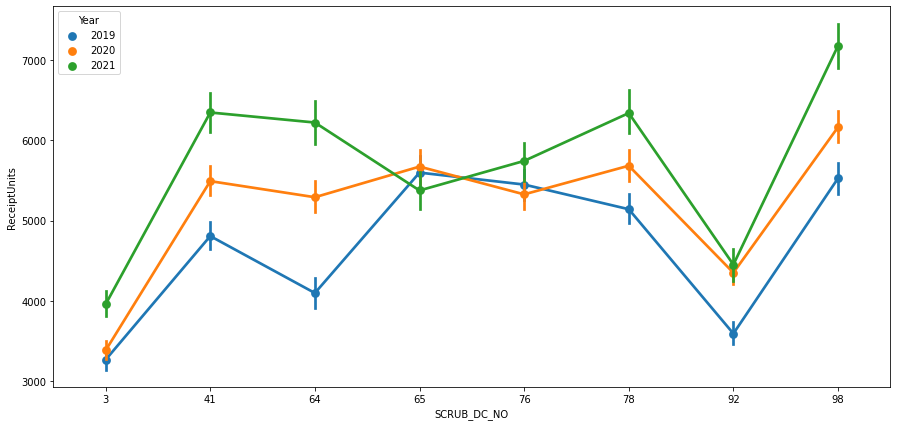

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(x='SCRUB_DC_NO', y='ReceiptUnits', hue='Year', data=units)
plt.show()

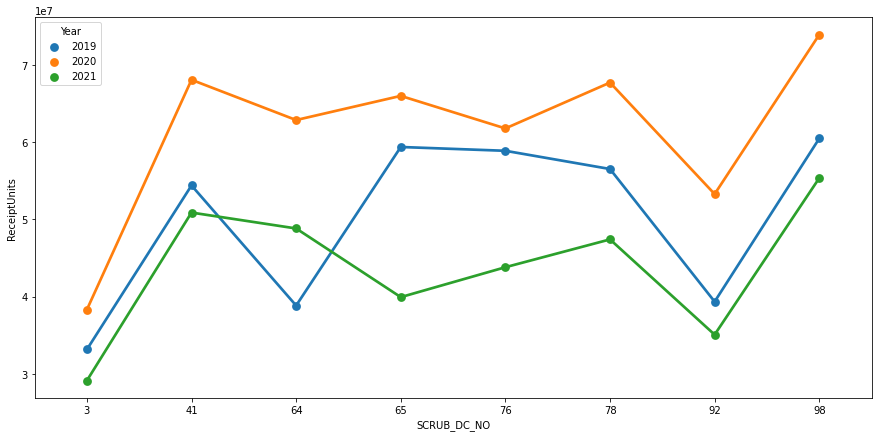

In [ ]:
plt.figure(figsize=(15,7))
grouped = pd.DataFrame(units.groupby(['Year','SCRUB_DC_NO'])['ReceiptUnits'].sum().reset_index())
sns.pointplot(x='SCRUB_DC_NO', y='ReceiptUnits', hue='Year', data=grouped)
plt.show()

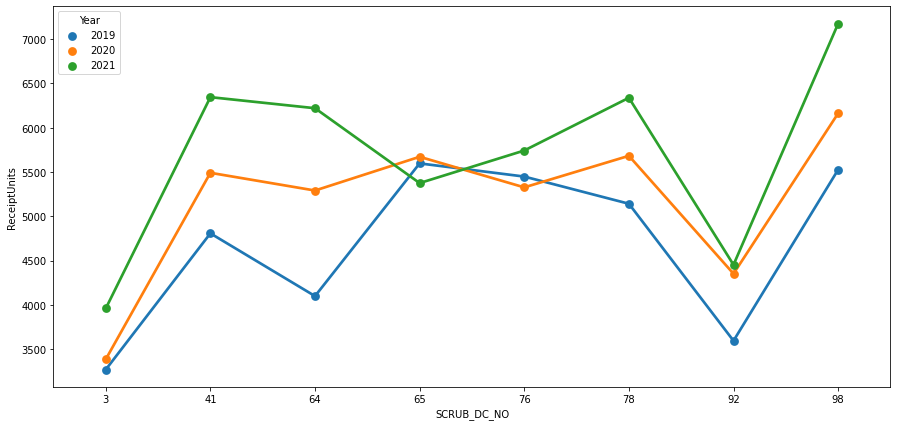

In [ ]:
plt.figure(figsize=(15,7))
grouped = pd.DataFrame(units.groupby(['Year','SCRUB_DC_NO'])['ReceiptUnits'].mean().reset_index())
sns.pointplot(x='SCRUB_DC_NO', y='ReceiptUnits', hue='Year', data=grouped)
plt.show()

In [ ]:
units['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

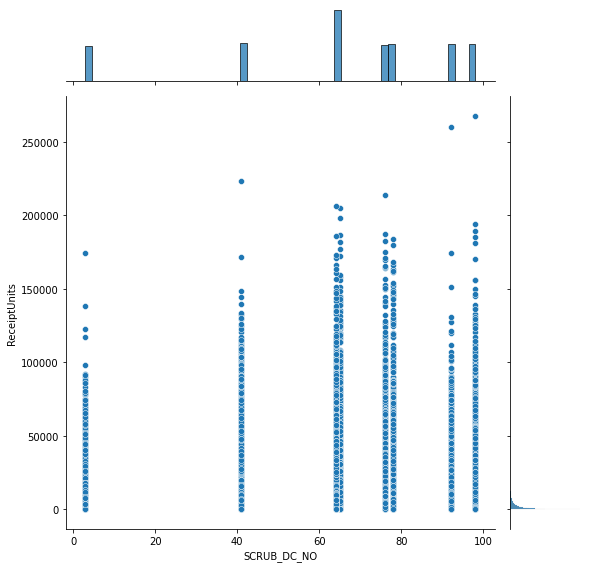

In [ ]:
sns.jointplot(x="SCRUB_DC_NO", y="ReceiptUnits", data=units, height=8)
plt.show()

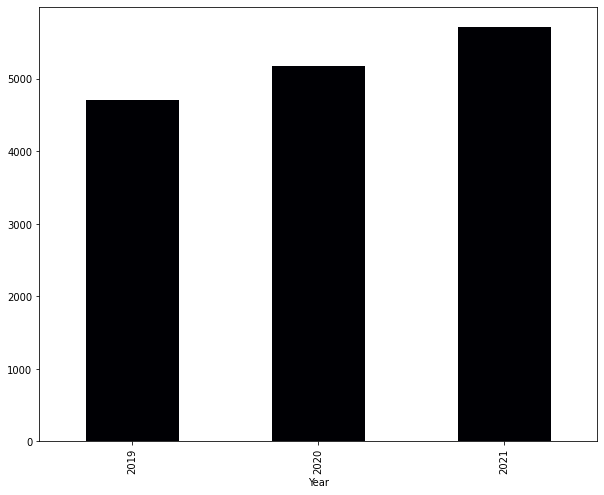

In [ ]:
plt.figure(figsize=(10,8))
units.groupby('Year')['ReceiptUnits'].mean().plot(kind='bar',cmap = 'inferno')
plt.show()

***From the above figure we can see that units are increasing with the increase in the year***

In [ ]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

In [ ]:
units.sample()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
207228,41,265,2021,13,4488.0
